In [3]:
from numpy import random, array
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

In [2]:
data = pd.read_csv("weather_dataset.csv")
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [3]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
data.shape

(142193, 24)

In [9]:
data['RainToday'].value_counts(dropna=False)

No     109332
Yes     31455
NaN      1406
Name: RainToday, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [5]:
data=data.fillna(2)

In [6]:
data.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data['RainToday'].replace({'No':0,'Yes':1},inplace=True)
data['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [8]:
df=data.drop(['Date','Location','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm'],axis=1)

In [10]:
df = df.reindex(random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,19.4,41.6,0.0,13.8,9.5,20.0,15.0,16.0,8.0,1012.6,1008.7,3.0,2.0,33.7,41.1,0,0.0,0
1,23.5,30.3,53.0,6.4,0.1,24.0,24.0,74.0,68.0,1006.6,1003.3,8.0,8.0,27.0,28.5,1,31.2,1
2,6.2,15.8,0.6,2.0,2.0,28.0,31.0,59.0,34.0,2.0,2.0,2.0,2.0,9.8,13.5,0,0.0,0
3,25.3,40.4,0.0,8.0,2.0,13.0,15.0,51.0,29.0,1012.7,1007.9,0.0,3.0,32.3,40.2,0,0.0,0
4,15.2,26.0,0.0,2.0,2.0,7.0,13.0,66.0,50.0,2.0,2.0,2.0,2.0,20.0,24.7,0,0.0,0
5,23.0,34.4,0.0,2.0,2.0,7.0,19.0,43.0,29.0,1009.3,1007.7,2.0,2.0,27.3,32.6,0,0.0,0
6,11.2,20.6,1.2,4.8,5.1,9.0,17.0,96.0,52.0,1019.6,1018.9,7.0,6.0,13.5,18.7,1,0.2,0
7,15.3,25.7,0.0,2.0,2.0,6.0,19.0,79.0,62.0,2.0,2.0,2.0,2.0,20.0,22.9,0,0.0,0
8,8.5,16.4,0.2,2.0,2.0,7.0,11.0,85.0,73.0,1027.0,1024.5,2.0,2.0,13.0,14.1,0,1.8,1
9,13.8,19.0,0.3,5.6,6.3,2.0,11.0,59.0,61.0,1015.2,1012.3,8.0,0.0,15.8,17.8,0,0.0,0


In [11]:
X = df[["RainToday","Rainfall","MinTemp","MaxTemp","RISK_MM","WindSpeed9am","WindSpeed3pm"]]
y=df["RainTomorrow"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# LINEAR REGRESSION MODEL

In [14]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [15]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
clf.predict(X_test)

array([-0.03554735,  0.22314523,  0.27546655, ...,  0.37070929,
        0.17191911,  0.0494325 ])

In [17]:
y_test

128428    0
124632    0
57393     1
179       0
73023     0
110733    0
27244     0
32771     0
113202    0
97800     0
14768     0
57856     1
3080      1
125672    0
54760     0
116148    1
49788     1
138246    1
66037     0
12212     1
21445     0
89332     1
70286     1
37881     0
107273    0
82625     1
43040     0
54085     1
90629     1
24136     0
         ..
139707    0
94051     0
38720     0
52952     0
102681    1
4861      0
36167     1
79874     0
114271    0
46544     0
19891     0
117940    0
2891      0
7609      0
113062    0
58650     0
70636     0
307       0
30423     0
59494     1
20547     0
42918     1
41872     0
75546     0
98387     1
14632     0
115542    0
84744     0
87806     0
114831    0
Name: RainTomorrow, Length: 28439, dtype: int64

In [18]:
clf.score(X_test,y_test)

0.3300775165804921

# K MEANS

In [19]:
kmeans = KMeans(n_clusters = 5).fit(X_train)

In [20]:
kmeans.cluster_centers_

array([[ 0.22690132,  1.3466957 ,  7.30450974, 18.54483927,  1.34243288,
         8.73554368, 12.72564425],
       [ 0.31106136,  2.1839222 , 12.16531169, 21.31317778,  2.02155601,
        23.60826978, 27.91282446],
       [ 0.66999413,  9.40587199, 17.13822666, 23.37005285, 52.19630065,
        15.77392836, 19.0640047 ],
       [ 0.14806722,  0.98256319, 17.47123358, 30.1918238 ,  1.1508214 ,
        12.30312104, 17.54889267],
       [ 1.        , 49.53732394, 16.25747562, 22.61153846, 10.26923077,
        17.00650054, 20.01570964]])

In [21]:
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 1])

# DECISION TREE

In [22]:
from sklearn import tree

In [23]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [25]:
clf.score(X_test,y_test)

1.0

In [ ]:
NEURAL N

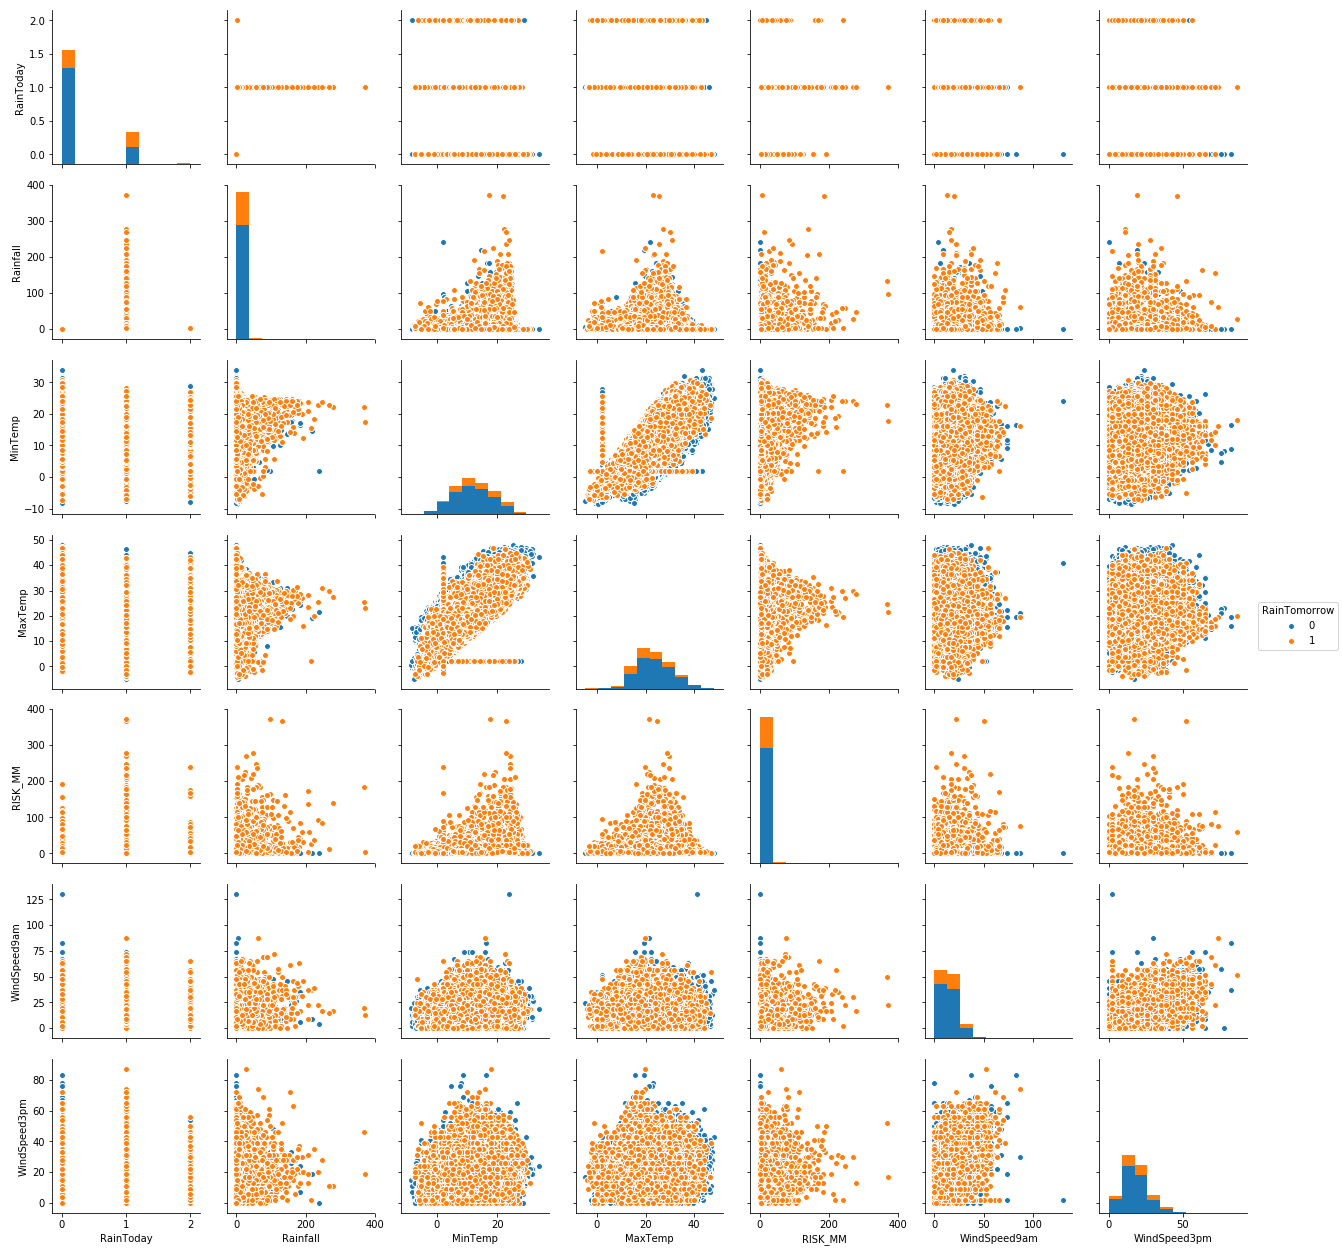

In [26]:
sns.pairplot( data=df, vars=("RainToday","Rainfall","MinTemp","MaxTemp","RISK_MM","WindSpeed9am","WindSpeed3pm"), hue='RainTomorrow' )

In [27]:
df_norm = df[["RainToday","Rainfall","MinTemp","MaxTemp","RISK_MM","WindSpeed9am","WindSpeed3pm"]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(5)

,RainToday,Rainfall,MinTemp,MaxTemp,RISK_MM,WindSpeed9am,WindSpeed3pm
69669,0.0,0.000000,0.285377,0.396975,0.001078,0.153846,0.229885
21277,0.5,0.003774,0.679245,0.635161,0.001078,0.146154,0.402299
39366,0.0,0.000000,0.523585,0.725898,0.000000,0.115385,0.126437
112867,0.0,0.000000,0.441038,0.368620,0.000000,0.184615,0.275862
39694,0.0,0.000000,0.466981,0.633270,0.000000,0.084615,0.172414


In [28]:
df_norm.describe()


,RainToday,Rainfall,MinTemp,MaxTemp,RISK_MM,WindSpeed9am,WindSpeed3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.120495,0.006325,0.486811,0.528898,0.006363,0.106832,0.210688
std,0.225106,0.022704,0.151534,0.135743,0.022852,0.068671,0.103506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.377358,0.429112,0.000000,0.053846,0.126437
50%,0.000000,0.000000,0.483491,0.517958,0.000000,0.100000,0.195402
75%,0.000000,0.002156,0.596698,0.623819,0.002156,0.146154,0.275862
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
target=df['RainTomorrow']
target.sample(5)

9188      0
8252      0
130448    0
119866    0
122714    0
Name: RainTomorrow, dtype: int64

In [30]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,RainToday,Rainfall,MinTemp,MaxTemp,RISK_MM,WindSpeed9am,WindSpeed3pm,RainTomorrow
41582,0.0,0.002156,0.488208,0.463138,0.0,0.146154,0.218391,0
129329,0.5,0.009164,0.247642,0.332703,0.0,0.053846,0.229885,0
39620,0.0,0.000000,0.636792,0.661626,0.0,0.046154,0.252874,0
78928,0.0,0.000000,0.825472,0.790170,0.0,0.146154,0.252874,0
133443,0.5,0.004852,0.641509,0.561437,0.0,0.015385,0.344828,0


In [31]:
train_test_per = 80/100.0
df['train'] = random.rand(len(df)) < train_test_per
df.sample(n=5)

,RainToday,Rainfall,MinTemp,MaxTemp,RISK_MM,WindSpeed9am,WindSpeed3pm,RainTomorrow,train
122495,0.0,0.000000,0.681604,0.903592,0.000000,0.100000,0.298851,0,False
21681,0.0,0.000000,0.431604,0.497164,0.049596,0.130769,0.195402,1,True
42068,0.0,0.000000,0.323113,0.510397,0.000000,0.084615,0.149425,0,True
65542,0.0,0.000000,0.483491,0.500945,0.000539,0.000000,0.103448,0,True
111026,0.0,0.001617,0.516509,0.533081,0.008086,0.069231,0.195402,1,True


In [32]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,RainToday,Rainfall,MinTemp,MaxTemp,RISK_MM,WindSpeed9am,WindSpeed3pm,RainTomorrow
59784,0.0,0.001617,0.518868,0.502836,0.002695,0.084615,0.229885,0
104981,0.0,0.000000,0.311321,0.421550,0.000000,0.046154,0.080460,0
62255,0.0,0.000539,0.308962,0.413989,0.000000,0.084615,0.275862,0
74651,0.5,0.010243,0.485849,0.404537,0.026415,0.153846,0.172414,1
113074,0.0,0.000000,0.412736,0.383743,0.002156,0.169231,0.275862,0


In [33]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,RainToday,Rainfall,MinTemp,MaxTemp,RISK_MM,WindSpeed9am,WindSpeed3pm,RainTomorrow
93875,0.5,0.009704,0.450472,0.378072,0.013477,0.338462,0.528736,1
18781,0.0,0.000000,0.625000,0.553875,0.000000,0.015385,0.103448,0
47921,0.0,0.000000,0.483491,0.500945,0.000000,0.184615,0.425287,0
118537,0.5,0.019946,0.790094,0.780718,0.016173,0.030769,0.126437,1
42016,0.0,0.000000,0.509434,0.741021,0.002426,0.253846,0.402299,0


In [34]:
X = train.values[:,:7]
X[:6]

array([[0.00000000e+00, 1.61725067e-03, 7.45283019e-01, 6.61625709e-01,
        5.39083558e-04, 6.92307692e-02, 2.75862069e-01],
       [0.00000000e+00, 0.00000000e+00, 3.46698113e-01, 4.59357278e-01,
        0.00000000e+00, 0.00000000e+00, 2.18390805e-01],
       [5.00000000e-01, 3.23450135e-02, 5.75471698e-01, 4.91493384e-01,
        2.69541779e-03, 1.53846154e-01, 2.75862069e-01],
       [0.00000000e+00, 0.00000000e+00, 4.08018868e-01, 4.57466919e-01,
        2.15633423e-03, 5.38461538e-02, 1.72413793e-01],
       [0.00000000e+00, 0.00000000e+00, 6.60377358e-01, 7.37240076e-01,
        0.00000000e+00, 6.92307692e-02, 1.72413793e-01],
       [0.00000000e+00, 0.00000000e+00, 3.18396226e-01, 4.23440454e-01,
        0.00000000e+00, 1.46153846e-01, 2.18390805e-01]])

In [35]:
targets = [[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]]
y = array([targets[int(x)] for x in train.values[:,7:8]])
y[:8]

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [36]:
num_inputs = len(X[0])
hidden_layer_neurons = 7
random.seed(4)
w1 = 2*random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101,  0.95254891],
       [-0.98753949, -0.49403528, -0.13041694,  0.55876584, -0.60462985,
         0.72598647,  0.96680135],
       [-0.67231552,  0.19466789, -0.9820278 , -0.22685743, -0.91167988,
         0.91330594, -0.12770671],
       [ 0.89795461,  0.57261197,  0.7325786 , -0.65366916, -0.85010283,
         0.20148544, -0.66405563],
       [ 0.46676034, -0.18311228,  0.05581765,  0.87514317,  0.04339224,
        -0.78361323, -0.68355319],
       [ 0.0904053 ,  0.04880816,  0.27522049, -0.19700911,  0.29961022,
        -0.20619999,  0.24783223],
       [ 0.53480993, -0.64205218, -0.24884846,  0.00506612,  0.37333416,
        -0.4926407 ,  0.10948173]])

In [37]:
num_outputs = len(y[0])
w2 = 2*random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.24986169,  0.79100233, -0.27429282,  0.27511415, -0.6171072 ,
        -0.00441177, -0.63510919],
       [ 0.83676608, -0.13635586,  0.6603762 , -0.16644739,  0.80933518,
        -0.19034957, -0.33765099],
       [ 0.14427754,  0.6908873 ,  0.72202862,  0.19137623, -0.83067678,
         0.19453321, -0.50909258],
       [ 0.4651869 ,  0.78930258,  0.02946794,  0.20712702, -0.86986438,
         0.08014946, -0.74162643],
       [ 0.22912569, -0.27269931,  0.53551607, -0.90293173, -0.78036376,
         0.36804643,  0.02930739],
       [ 0.14328274,  0.68741399, -0.02452472,  0.62028884,  0.02048726,
         0.85344139,  0.33385554],
       [-0.70254632, -0.27089365,  0.73154983, -0.29942958, -0.62194848,
        -0.05475738, -0.21443765]])

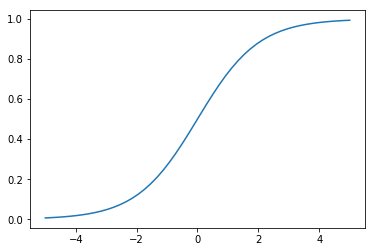

In [38]:
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [39]:
learning_rate = 0.2 # slowly update the network
for epoch in range(50000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

Error: 0.06413773412373482


In [40]:
X = test.values[:,:7]
y = np.array([targets[int(x)] for x in test.values[:,7:8]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['RainTomorrow']]
testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction']

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

        RainTomorrow  Prediction
7                  0           0
9                  0           0
10                 0           0
12                 0           0
18                 0           0
23                 0           0
36                 0           0
39                 0           0
51                 0           0
54                 0           0
57                 0           0
58                 1           0
61                 0           0
74                 1           0
84                 1           0
85                 0           0
89                 0           0
99                 0           0
109                1           0
110                1           0
123                0           0
125                0           0
128                0           0
135                0           0
141                1           0
146                0           0
157                0           0
161                0           0
176                0           0
179       

C:\Users\clpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\clpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [1]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

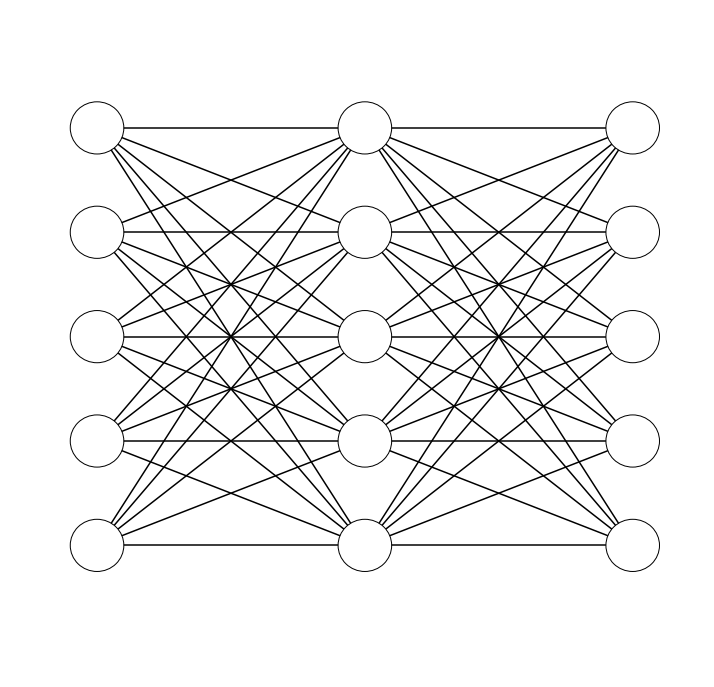

In [4]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5, 5, 5])